# The Chicxulub Impact

## Introduction

The Chicxulub Crater is ~200 km diameter impact structure located in present-day Mexico. The crater is located half onshore and half offshore at the northern end of the Yucatan Penisula. The crater is centred on the present-day village of Chicxulub, from which the crater gets its name.

The crater is buried beneath the surface with no expression of it at the surface, except for a notable ring of cenotes (sinkholes) that mark the edge of the crater. The crater was not discovered until the early 1990s, even though scientists had recognised that a large impact event must have been associated with the end Cretaceous mass extinction from the early 1980s.

The crater was identified on the basis of geophysical anomalies; the rocks that make up the crater produce very small changes to the strength of gravity and and magnetic field strength at the Earth's surface which can be detected by sensitive geophysical equipment. These methods do not provide a unique picture of exactly what the Chicxulub Crater looked like, to do that required a reflection seismic survey. Reflection seismics is a method of mapping strata beneath the Earth's surface by making sound waves at the Earth's surface, the sound travels into the Earth and when the sound wave hits an interface between different layers, some energy is reflected back toward the surface. By recording the sound waves when they return to the surface a picture can be built of what the sub-surface looks like (the same principle is used in medicine for ultrasound scans, and by bats for navigation).

The seismic reflection images (1996) was the first proof that the Chicxulub Crater was ~200 km in diameter. Crater scaling, which we have already explored by conducting impact experiments and the Earth Impacts Effects Calculator, shows that for an impact at an average extraterrestrial impact velocity of ~20 km/s, the impactor must have been 10-14 km across. Independently, characterisation of the boundary layer deposits and its unusual chemistry suggests an impactor size of ~10 km.

An impact of this size would have had a number of catastrophic effects on the environment:

##### Q1
Try running the Earth Impact Effects Calculator for a Chicxulub-like event. Use a distance from the of > 200 km, a projectile diameter of 14km, an impact velocity of 20 km/s, and an impact angle of 90 degrees. How much energy did the impact have? How does this compare the yield of a nuclear weapon? At what distance would you have to be from the impact site to survive the effect of the thermal radiation? At what distance would you be taller than the amount of ejecta about to land on you? How devastating would the air blast be?

All of the consequences of impact determined in the Earth Impact Effects Calculator are the immediate consequence of the impact. However, impacts like Chicxulub have the potential to cause widespread effects for the Earth's climate. Here, we will look at the mechanisms that may lead to catastrophic climate change.

For obvious reasons, it is not possible to conduct a physical experiment of an event like the Chicxulub impact. Instead, we have to use computational models. Here, we are going to look at the results of a numerical impact simulation of the Chicxulub event. This simulation was run using the iSALE shock physics code. This notebook uses a coding language, Python, to manipulate the data produced by that model. The notebook is interactive, so that you are able to modify the outputs if you wish to!

In this notebook, we will first introduce exactly what the data produced by the numerical model looks like. Then, we will begin to make simple plots to show how the Chicxulub Crater formed. Finally, we will consider how the Chicxulub impact may have affected the Earth's climate through the production of climatically active gases.

## Getting Started

### Importing packages and data

First, we have to start by installing some packages to python for the purposes of manipulating the data and plotting it. Select the next "cell" and press the "Run" button.

In [1]:
%%capture

# Installing python packages
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install pandas

# Importing python packages - contains useful functions for scientific computing and plotting!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Now we will import the data which exists in a file called 'output.csv'

In [2]:
# Import data - The data exists as a comma delimited table (can be opened in MS Excel)
data = pd.read_csv('output.csv')

### What's in 'data'?

"data" is a table with over 500,000 rows! Each row provides information on a single package of material within the numerical model. This package of material moves throughout the simulation as the crater forms. Each column can be called with the following:

data['s0_x'] - x location in km from the central axis at t = 0s

data['s0_y'] - y location in km above sea level at t = 0s


data['s15_x'] - x location in km from the central axis at t = 30s

data['s15_y'] - y location in km above sea level at t = 30s


data['s50_x'] - x location in km from the central axis at t = 100s

data['s50_y'] - y location in km above sea level at t = 100s


data['s100_x'] - x location in km from the central axis at t = 200s

data['s100_y'] - y location in km above sea level at t = 200s


data['s300_x'] - x location in km from the central axis at t = 600s

data['s300_y'] - y location in km above sea level at t = 600s


data['TrP'] - Peak Pressure in Pa (Pascal, the standard unit of measurement for pressure which is equal to 1 N/m^2)


So, the column data['s0_x'] contains the x locations of all of the material packages at the first timestep. It is simply a list of values that looks something like this:

x = [3, 5, 7]

The column data data['s0_y'] contains the y locations of all the material packages in the first time step. It looks something like this:

y = [2, 4, 1]

The first package of material is therefore located at (3, 2), the second package of material is located at (5, 4), and the third package of material is located at (7, 1).

## Visualising Data

So, if we wanted to create a plot of what the model looks like at the first timestep, we would need to create a scatter plot where data['s0_x'] is plotted against data['s0_y'].

### Getting to grips with the data - plotting figures

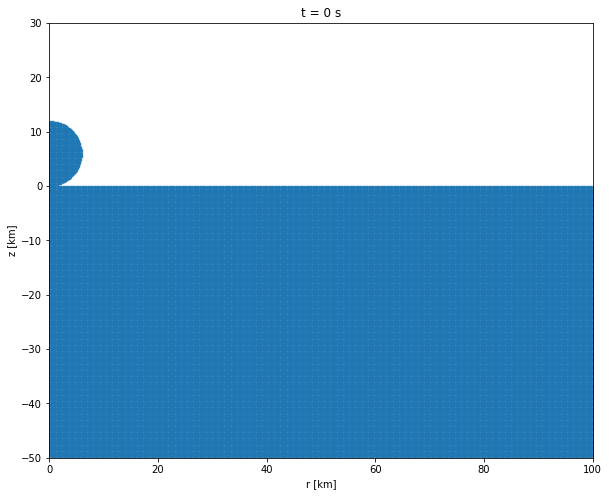

In [3]:
# Making a figure to show the crater at t = 0s
# Let's make a figure using the matplotlib package!
fig = plt.figure(figsize = (14,8))

# Now let's add the axes we want to plot onto:
ax = fig.add_subplot(111, aspect = 'equal')
# The argument '111' specifies the location of the axes on the figure.
# The argument 'aspect' specifies that 1 km of distance on the x-axis should be the same length as 1 km in the y-axis.

# Specifying the boundary of the axes in km
ax.set_xlim([0, 100])
ax.set_ylim([-50, 30])

# Writing axes labels
ax.set_xlabel('r [km]')
ax.set_ylabel('z [km]')

# Plotting the data
p = ax.scatter(data['s0_x'], data['s0_y'], s = 0.1)
# The first argument in the brackets is the x-data, the second argument is the y-data
# The third argument ('s') specifies the size of each point

# Set title
ax.set_title('t = 0 s')

# Save the Figure and show it!
fig.savefig('t0.png')
plt.show()

### What do we see?

In this figure, each of the ~500,000 material packages have been plotted at the locations they were at at the start of the simulation ("the initial condition"). The model is cylindrically symmetrical, meaning that rotationally symmetrical about the y-axis. The impactor can be seen just touching the surface at this timestep, and due to the cylindrical symmetry, its shape is spherical. You cannot see it from this figure, but the impactor is travelling at 15 km/s directly downwards into the target.

### What happens next?

Let's make a similar plot, but at a later time in the simulation.

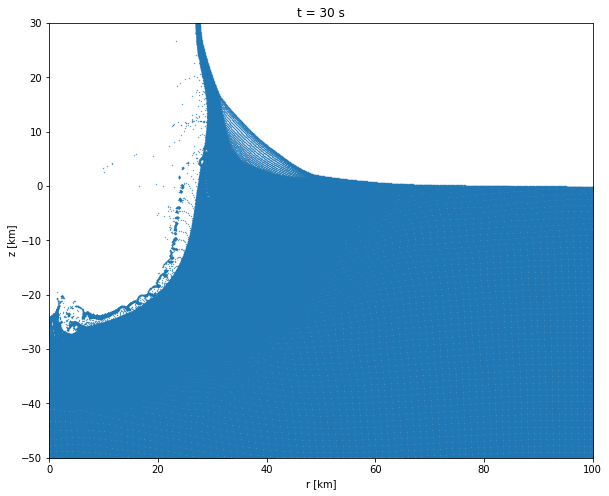

In [4]:
# Making a figure to show the crater at t = 30s
# Make a figure and axes
fig = plt.figure(figsize = (14,8))
ax = fig.add_subplot(111, aspect = 'equal')

# Axes boundaries
ax.set_xlim([0,100])
ax.set_ylim([-50, 30])

# Axes labels
ax.set_xlabel('r [km]')
ax.set_ylabel('z [km]')

# Plotting the data
p = ax.scatter(data['s15_x'], data['s15_y'], s = 0.1)

# Title
ax.set_title('t = 30 s')

# Save and show
fig.savefig('t30.png')
plt.show()

We are now looking at the crater 30 seconds after the moment of impact. The impactor has buried itself within the target and generated a shock wave (a special type of sound wave caused by the impactor travelling faster than the speed of sound in the rock. Shock waves unlike sound waves, produce permanent deformation, accelerate material, and deposit large amounts of energy). The shock wave acts to drive material away from the point of impact, excavating the crater.

### After the Transient Crater

By 30 seconds after impact the crater has reached the largest volume it will ever reach, and is known as the 'Transient Crater'. From this time, the crater will 'collapse': material will slide down the crater walls onto the crater floor, and the crater floor will rise upwards.

##### Q2
Try making similar plots for t = 100 s, t = 200 s, and t = 600 s by copying and pasting, and then modifying the previous plotting script, in each of the following three boxes.

In [5]:
# Making a figure to show the crater at t = 100s
# Make a figure and axes


# Axes boundaries


# Axes labels


# Plotting the data


# Title


# Save and show


In [6]:
# Making a figure to show the crater at t = 200s



In [7]:
# Making a figure to show the crater at t = 600s



## Melting and Vapourisation during Impacts

Impacts cause the melting and vapourisation of rocks because of the passage of the impact-generated shock wave which deposits energy in the target, both in the form of kinetic energy and in terms of heat energy. If rock is heated sufficiently, it can melt or even vapourise (become a gas).

The amount of heat energy (and kinetic energy) deposited by a shock wave depends on its pressure, high pressure shock waves deposit large amounts of energy while low pressure shock waves deposit smaller amounts of energy.

Let's take a look at how shock pressure varies at an impact structure - to do this we are going to make a similar plot to before, except that this time we are going to colour the material by the peak pressure that the material experienced.

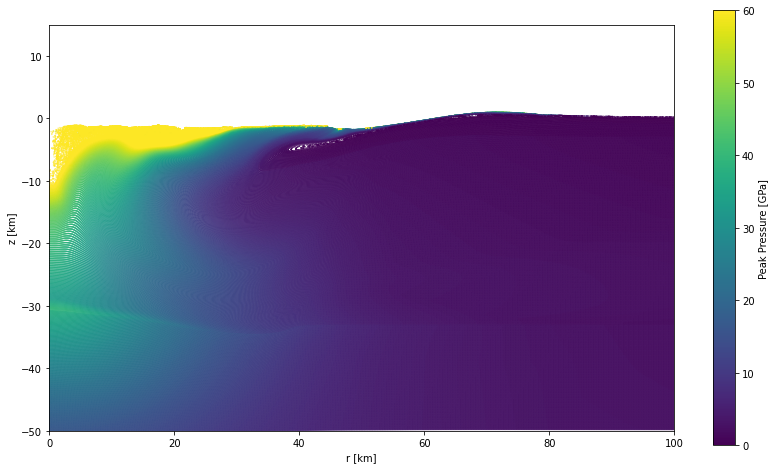

In [8]:
# Make a figure and axes
fig = plt.figure(figsize = (14,8))
ax = fig.add_subplot(111, aspect = 'equal')

# Axes boundaries
ax.set_xlim([0,100])
ax.set_ylim([-50, 15])

# Axes labels
ax.set_xlabel('r [km]')
ax.set_ylabel('z [km]')

# Plotting the data - using x and y locations at the final time, and colouring the material by the peak pressure
p = ax.scatter(data['s300_x'], data['s300_y'], c = data['TrP']*1.e-9, vmin = 0, vmax = 60, s = 0.1)
# vmin and vmax specify the minimum and maximum colour values. i.e. the colour scale will go from 0 GPa to 60 GPa

# Making a colourbar to show what the colours correspond to
cbar = plt.colorbar(p)
cbar.set_label('Peak Pressure [GPa]')

# Save and show
plt.show()
fig.savefig('PeakPressure_300s.png')

We can see here that material far away from the center of the crater experiences very low shock pressures, while material close to the center and near the surface experiences very high shock pressures, > 60 GPa.

I deliberately chose a maximum value of 60 GPa because 60 GPa is the shock pressure at which granite (the rock type that most of the crust is made of) melts. Everything that experiences 60 GPa or more melts, while everything that experiences <60 GPa remains solid, though may be very hot!

As you can see, the Chicxulub Crater had a pool of impact melt, 2-5 km deep and with a radius of ~30 km. That is a vast amount of magma/lava!

But why do some rocks experience high shock pressures, and others experience low shock pressures?

To look at this, we are going to create a very similar plot where, instead of plotting the material at its final location, we want to plot this data at its original location. This is known as a 'Provenance Plot'.

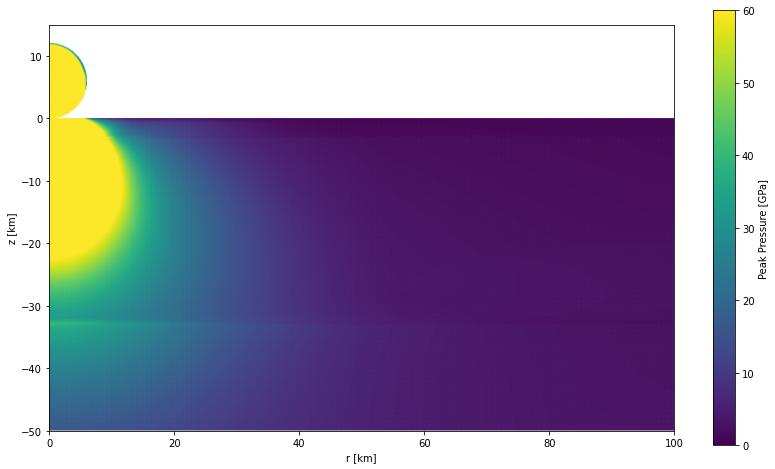

In [9]:
# Make a figure and axes
fig = plt.figure(figsize = (14,8))
ax = fig.add_subplot(111, aspect = 'equal')

# Axes boundaries
ax.set_xlim([0,100])
ax.set_ylim([-50, 15])

# Axes labels
ax.set_xlabel('r [km]')
ax.set_ylabel('z [km]')

# Plotting the data - using x and y locations at the initial time, and colouring the material by the peak pressure
p = ax.scatter(data['s0_x'], data['s0_y'], c = data['TrP']*1.e-9, vmin = 0, vmax = 60, s = 0.1)

# Making a colourbar
cbar = plt.colorbar(p)
cbar.set_label('Peak Pressure [GPa]')

# Save and show
plt.show()
fig.savefig('PeakPressureProvenance.png')

As we can see, the material that will go on to melt, which experiences a shock pressure > 60 GPa, is that material that is close to the point of impact. The entire impactor melts (and some of it may be vapourised), and a larger region of the target also melts (and may be vapourised). The shock pressure experienced by the target decreases as distance increases from the point of impact.

Peak shock pressure decreases with distance from the point of impact for several reasons: 1) the shock wave originates from a point and expands outwards, to conserve energy the amplitude of the shock wave must decrease as the area that it encompasses increases, 2) shock waves deposit heat and kinetic energy, when this happens the shock wave must lose amplitude to conserve energy.

## Generation of Climatically Active Gases

Most rocks, when they melt and vapourise will not produce gases that affect the climate. As you are well aware, CO2 (carbon dioxide) is an important greenhouse gas in the Earth's atmosphere. Most rocks do not contain a large amounts of Carbon from which to form CO2 when they vapourise in an impact.

An exception to this is limestones, sedimentary rocks which are primarily composed of the mineral calcite, CaCO3. If limestone is present in the target of an impact, calcite will decompose by the following reaction:

CaCO3 (solid) -> CaO (solid) + CO2 (gas)

This reaction occurs when the shock pressure is ~55 GPa or greater.

Another potential climatically active gas generated by the vapourisation of rocks is SO2, Sulfur Dioxide. When present in the upper atmosphere, SO2 causes global cooling by forming aerosols which reflect the Sun's energy into space before it arrives at the Earth's surface.

SO2 can be generated by the vapourisation of sulfate bearing minerals which are common in evaporites, a type of sedimentary rock formed by the evaporation of salt-water. The most common sulfur bearing minerals in evaporites is anhdyrite (CaSO4). Anhydrite will decompose by the following reaction:

CaSO4 (solid) -> CaO (solid) + 1/2 O2 (gas) + SO2 (gas)

This reaction occurs when the shock pressure is ~100 GPa or greater.

Unfortunately, the target of the Chicxulub crater was a ~3 km thick layer of sedimentary rocks containing ~50% limestone and ~50% anhydrite. The impact is therefore likely to produce some amount of climatically active gases. We will now use the results the numerical simulation to determine how much CO2 and SO2 were generated by the Chicxulub impact. We will then compare these quantities to the amount of anthropogenic (man-made) CO2 released each year and the amount of SO2 released by some of the largest volcanic eruptions to have occured on Earth, and use those estimates to consider the effect on the Earth's climate.

To do this, we need to follow a number of steps:

1) We must determine the volume of material that corresponds to each package of material.

2) We must determine what how many material packages experience greater than 55 GPa (required to decompose limestone to CO2), and greater than 100 GPa (required to decompose anhydrite to SO2).

3) We must exclude the volume of material that is not sedimentary (that is originally located beneath 3 km depth).

4) We must determine the mass of limestone that decomposes and the mass of anhydrite that decomposes.

5) We must convert those masses of rock into masses of gas produced.

In [10]:
# Stage 1 - Determining volumes of each material package

# Each package has an initial cross-sectional width and height of 0.1 km
# Each package represents a 360 degree ring of material. (each package is donut shaped!)

# The volume of a donut is given by the cross-sectional area multiplied by the mid-circumference of the donut.

# The cross-sectional area is 0.1 X 0.1 = 0.01 m^2
# The circumference of the donut C = 2 * pi * r, where r is the initial x-location of the package

# Volumes = A * (C)
Volumes = 0.01 * (2 * np.pi * data['s0_x'])

In [11]:
# Stage 2 - Determine the Material Packages that experience >55 GPa and >100 GPa

Vol55 = np.ma.masked_where(data['TrP']*1.e-9 < 55, Volumes)
# Creates an array of the volumes where all packages that experience less than 55 GPa are masked.

Vol100 = np.ma.masked_where(data['TrP']*1.e-9 < 100, Volumes)
# Creates an array of the volumes where all packages that experience less than 100 GPa are masked.

In [14]:
# Stage 3 - Exclude non-sedimentary rocks

Vol55 = np.ma.masked_where(data['s0_y'] < -3, Vol55)
Vol55 = np.ma.masked_where(data['s0_y'] > 0, Vol55)
# Modifies the array of volumes that experienced >55 GPa to remove all packages below 3 km depth (Not Sediments!) and above the surface (The Impactor!)

Vol100 = np.ma.masked_where(data['s0_y'] < -3, Vol100)
Vol100 = np.ma.masked_where(data['s0_y'] > 0, Vol100)
# Modifies the array of volumes that experienced >110 GPa to remove all packages below 3 km depth (Not Sediments!) and above the surface (The Impactor!)


# SUM THE VOLUME OF ALL PACKAGES
V_55 = np.sum(Vol55.compressed())
V_100 = np.sum(Vol100.compressed())

print ('Volume of Sedimentary rock > 55 GPa = {:.1f} km^3'.format(V_55))
print ('Volume of Sedimentary rock > 100 GPa = {:.1f} km^3'.format(V_100))

Volume of Sedimentary rock > 55 GPa = 629.8 km^3
Volume of Sedimentary rock > 100 GPa = 429.5 km^3


In [15]:
# Stage 4 - Determine the Masses of Limestone and Anhydrite that decompose

V_CaCO3 = V_55 * 0.5 # Volume of Limestone that decomposes
V_CaSO4 = V_100 * 0.5 # Volume of Anhydrite that decomposes

# Volume is related to Mass by Density: Density = Mass / Volume

rho_CaCO3 = 2700 # Density of Limestone in kg/m^3
rho_CaSO4 = 3000 # Density of Anhydrite in kg/m^3

M_CaCO3 = rho_CaCO3 * V_CaCO3 * 1.e+9 # Factor of 1.e+9 is to convert the density in kg/m^3 into kg/km^3
M_CaSO4 = rho_CaSO4 * V_CaSO4 * 1.e+9 # Factor of 1.e+9 is to convert the density in kg/m^3 into kg/km^3

print ('Mass of Vapourised CaCO3 = {:.2e} kg'.format(M_CaCO3))
print ('Mass of Vapourised CaSO4 = {:.2e} kg'.format(M_CaSO4))

Mass of Vapourised CaCO3 = 8.50e+14 kg
Mass of Vapourised CaSO4 = 6.44e+14 kg


In [16]:
# Stage 5 - Convert Masses of CaCO3 and CaSO4 into masses of CO2 and SO2

# Following the Chemical Equation: CaCO3 -> CaO + CO2
# One molecule of CaCO3 will transform to one molecule of CO2
# i.e. 1 mole of CaCO3 creates 1 mole of CO2 (1 mol = 6.022e+23 molecules)
# Moles are related to mass by the relation Mol = Mass/Mr, where Mr is the molecular mass

# So we need to know how many moles of CaCO3 correspond to the mass we have calculated
Mr_CaCO3 = 100.0
Mol_CaCO3 = M_CaCO3 / Mr_CaCO3

# We know that 1 mole of CaCO3 makes 1 mole of CO2 so:
Mol_CO2 = Mol_CaCO3

# Now we just need to convert that number of moles of CO2 back into a mass
Mr_CO2 = 44.0
M_CO2 = Mol_CO2 * Mr_CO2

print ('Mass of CO2 = {:.2e} kg'.format(M_CO2))

# New we have to do the same for SO2
# Following the Chemical Equation: CaSO4 -> CaO + 1/2 O2 + CO2
# One molecule of CaSO4 will transform to one molecule of CO2
# i.e. 1 mole of CaSO4 creates 1 mole of CO2

# So we need to know how many moles of CaSO4 correspond to the mass we have calculated
Mr_CaSO4 = 136.1
Mol_CaSO4 = M_CaSO4 / Mr_CaSO4

# We know that 1 mole of CaSO4 makes 1 mole of SO2 so:
Mol_SO2 = Mol_CaSO4

# Now we just need to convert that number of moles of CO2 back into a mass
Mr_SO2 = 64.1
M_SO2 = Mol_SO2 * Mr_SO2

print ('Mass of SO2 = {:.2e} kg'.format(M_SO2))


Mass of CO2 = 3.74e+14 kg
Mass of SO2 = 3.03e+14 kg


We have now calculated the mass of CO2 and SO2 that are generated from this simulation of the Chicxulub impact!

#### Q3

How does this mass of CO2 compare to the annual amount of CO2 released by anthropogenic sources at the current time? On this basis, do you beleive that the Chicxulub impact would have caused significant global warming? How does the mass of SO2 compare to the amount of SO2 released during large volcanic eruptions (Krakatoa, Tambora, Toba)? What was the effect of these eruptions on the Earth's climate? What would have a larger effect on the Earth's climate of this release of climatically active gases?

## Extra (optional) Challenges

Instead of plotting every single package of material, can you plot a single package of material and track it across all timesteps? How does the travel path of individual packages of material change depending on where that material starts?

In [60]:
# Make a Figure...